Epoch 1/10
578/578 ━━━━━━━━━━━━━━━━━━━━ 30s 46ms/step - accuracy: 0.4165 - loss: 1.2867 - val_accuracy: 0.5459 - val_loss: 1.0602
Epoch 2/10
578/578 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.5398 - loss: 1.0623 - val_accuracy: 0.5802 - val_loss: 0.9963
Epoch 3/10
578/578 ━━━━━━━━━━━━━━━━━━━━ 22s 38ms/step - accuracy: 0.5852 - loss: 0.9687 - val_accuracy: 0.6183 - val_loss: 0.9124
Epoch 4/10
578/578 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.6163 - loss: 0.9096 - val_accuracy: 0.6298 - val_loss: 0.8796
Epoch 5/10
578/578 ━━━━━━━━━━━━━━━━━━━━ 20s 34ms/step - accuracy: 0.6457 - loss: 0.8581 - val_accuracy: 0.6513 - val_loss: 0.8581
Epoch 6/10
578/578 ━━━━━━━━━━━━━━━━━━━━ 22s 38ms/step - accuracy: 0.6701 - loss: 0.8094 - val_accuracy: 0.6528 - val_loss: 0.8376
Epoch 7/10
578/578 ━━━━━━━━━━━━━━━━━━━━ 24s 42ms/step - accuracy: 0.6852 - loss: 0.7805 - val_accuracy: 0.6548 - val_loss: 0.8298
Epoch 8/10
578/578 ━━━━━━━━━━━━━━━━━━━━ 23s 40ms/step - accuracy: 0.7068 - loss: 0.7173 - 

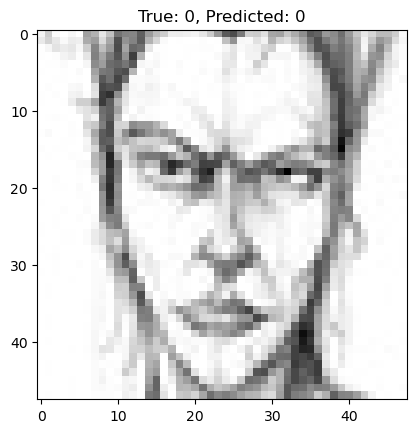

In [6]:
import numpy as np
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Load datasets
train_images = np.load(r"C:\Users\Laptop\Desktop\CV\Pothole detection\gesture_detection\train_validation\train_gesture.npy")
train_labels = np.load(r"C:\Users\Laptop\Desktop\CV\Pothole detection\gesture_detection\train_validation\train_gesture_labels.npy")
val_images = np.load(r"C:\Users\Laptop\Desktop\CV\Pothole detection\gesture_detection\train_validation\validation_gesture.npy")
val_labels = np.load(r"C:\Users\Laptop\Desktop\CV\Pothole detection\gesture_detection\train_validation\validation_gesture_labels.npy")

# Normalize image data to [0, 1]
train_images = train_images / 255.0
val_images = val_images / 255.0

# Ensure images have the correct shape (batch_size, height, width, channels)
train_images = np.expand_dims(train_images, axis=-1)  # Add a channel dimension for grayscale
val_images = np.expand_dims(val_images, axis=-1)

# Get the number of unique classes
num_classes = len(np.unique(train_labels))

# Convert labels to one-hot encoding
train_labels = to_categorical(train_labels, num_classes)
val_labels = to_categorical(val_labels, num_classes)


model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding="same", input_shape=(train_images.shape[1], train_images.shape[2], 1)),  # Include input shape
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation="relu", padding="same"),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.5),
    Dense(num_classes, activation="softmax")
])


model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


history = model.fit(
    train_images, train_labels,
    epochs=10,  # Adjust epochs based on dataset size
    batch_size=32,  # Adjust batch size based on hardware
    validation_data=(val_images, val_labels)
)

# Evaluate the model
val_loss, val_accuracy = model.evaluate(val_images, val_labels)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")

# Plot a sample image
import matplotlib.pyplot as plt

# Choose a sample image index
# sample_idx = 4
sample_idx= 10

# Get the true and predicted labels
true_label = np.argmax(val_labels[sample_idx])
predicted_label = np.argmax(model.predict(val_images[sample_idx].reshape(1, val_images.shape[1], val_images.shape[2], 1)))

# Plot the image and its true and predicted labels
plt.imshow(val_images[sample_idx].reshape(val_images.shape[1], val_images.shape[2]), cmap="gray")
plt.title(f"True: {true_label}, Predicted: {predicted_label}")
plt.show()

In [ ]:
# Explanation of Code:

# 1. Loading the Dataset
# The dataset is loaded using `np.load`, which loads pre-saved `.npy` files containing image arrays and their corresponding labels.
# Separate datasets are loaded for training and validation to ensure the model's performance is evaluated on unseen data during training.

# 2. Normalizing Image Data
# Image pixel values are scaled to the range [0, 1] by dividing by 255.
# This normalization ensures faster convergence during training by keeping input values small.

# 3. Reshaping Image Data
# Adds a channel dimension (grayscale: 1 channel) to the image arrays.
# CNN layers expect images with shape `(height, width, channels)`.

# 4. Preparing Labels
# `np.unique` finds the total number of unique classes (e.g., gestures).
# `to_categorical` converts class labels into one-hot encoded vectors, making them compatible with the softmax output of the model.

# 5. Defining the CNN Model
# - **Conv2D**: Performs convolution operations to activate features like edges or patterns in input images using the `ReLU` activation function.
#   The first layer specifies the input shape as `(height, width, channels)`.
# - **MaxPooling2D**: Reduces spatial dimensions to prevent overfitting and reduce computation.
# - **Flatten**: Converts 2D feature maps into a 1D vector for the dense layers.
# - **Dense**: Fully connected layers:
#   - 128 neurons with `ReLU` activation for learning high-level features.
#   - Output layer with `softmax` activation to produce class probabilities.
# - **Dropout**: Prevents overfitting by randomly setting a fraction (0.5) of input units to zero during training.

# 6. Compiling the Model
# - **Optimizer (`adam`)**: Adaptive Moment Estimation adjusts learning rates dynamically.
# - **Loss (`categorical_crossentropy`)**: Suitable for multi-class classification problems.
# - **Metrics (`accuracy`)**: Tracks how often predictions match the true labels.

# 7. Training the Model
# Fits the model to the training data.
# - `epochs=10`: Number of iterations over the entire dataset.
# - `batch_size=32`: Number of samples processed at a time.

# 8. Evaluating the Model
# Evaluates model performance on validation data.
# Outputs validation loss and accuracy.

# 9. Making Predictions and Plotting Results
# - `np.argmax`: Converts one-hot encoded labels to their original integer class.
# - `model.predict`: Predicts class probabilities for a single image.



# --- Theoretical Explanation ---

# Facial Gesture Detection Using CNN:
# CNNs are well-suited for facial gesture detection due to their ability to extract spatial hierarchies and visual patterns.

# 1. **Convolutional Layers**:
#    Detect local patterns like edges, contours, and corners of facial gestures.
#    Use filters to focus on specific features like eye blinks, smiles, or eyebrow movements.

# 2. **Pooling Layers**:
#    Reduce spatial dimensions to ensure the model focuses on critical features while making computation efficient.

# 3. **Fully Connected Layers**:
#    Aggregate the extracted features to classify gestures.

# 4. **Challenges**:
#    Variations in lighting, occlusion, facial angles, and individual differences affect accuracy.

# Reasons Why Detected Image May Not Match Predicted Labels:
# 1. **Model Overfitting**: The model might have learned the training data too specifically, failing to generalize.
# 2. **Ambiguity in Gestures**: Some gestures may share similar visual patterns.
# 3. **Data Preprocessing**: Improper normalization or augmentation could skew results.
# 4. **Model Architecture**: Insufficient capacity to capture subtle facial features.



# --- Practical Exam Questions ---

# 1. **Q**: Why do we normalize image data?
#    **A**: To ensure faster convergence by keeping input values small and within a similar range.

# 2. **Q**: What does the `Dropout` layer achieve?
#    **A**: It prevents overfitting by randomly deactivating a fraction of neurons during training.

# 3. **Q**: Why do we use `categorical_crossentropy` as the loss function?
#    **A**: Because it is ideal for multi-class classification tasks where the output is a probability distribution.

# 4. **Q**: What could cause high validation loss but high accuracy on training data?
#    **A**: Overfitting, where the model memorizes training data but fails to generalize to unseen data.

# 5. **Q**: Why might the predicted and true labels not match?
#    **A**: Factors include data preprocessing issues, insufficient training data, or poor generalization of the model.
